Importing all the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset

In [3]:
data = pd.read_csv("portu_banking_final.csv")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
#All the Attributes from the Dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [5]:
#shape of the dataset
data.shape

(41188, 21)

In [6]:
#information regarding the attributes of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [7]:
#Attribute containing the Data weather a client will subscribe a term deposit or not
data['y'].unique()

array([0, 1])

In [8]:
#Significance of the y 
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Column y is the Target variable in our Dataset which represent weather the customer has purchased the term deposit or not.

* 0 represents Term deposite Not purchased
* 1 represents Term deposite purchased

The Ratio of Purchased to not Purchased is almost 1:8 so the Target data is imbalanced 





Section II : Data Cleaning

In [9]:
#Data Types of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [10]:
data["age"].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [11]:
data["age"] = data["age"].replace({"35-30": "33", "30-35": "33", "25-30":"27", "18-25":"20", "30-32":"30", "50-55":"53", "45-50":"47", "20-25":"23", "20-40":"30", "35-40":"37", "30-40":"35"})

In [12]:
data["age"] = data["age"].astype(int)

In [13]:
data["age"].unique()

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       70, 76, 73, 66, 22, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

In [14]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [15]:
data['marital'] = data['marital'].replace({"married":"M", "single":"S", "divorced":"D", "unknown": "M"})

In [16]:
data['marital'].unique()

array(['M', 'S', 'D'], dtype=object)

In [17]:
data["marital"].value_counts()

M    25008
S    11568
D     4612
Name: marital, dtype: int64

In [18]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [19]:
data["education"] = data["education"].replace({"basic-4y":"basic.4y", "basic-6y":"basic.6y", "basic-9y":"basic.9y", "unknown": "university.degree"})

In [20]:
data["education"].value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [21]:
data["default"].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [22]:
data["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [23]:
data["default"] = data["default"].replace({"unknown":"no"})
data["default"].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [24]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [25]:
data['pdays']

0        999.0
1        999.0
2          6.0
3        999.0
4          3.0
         ...  
41183    999.0
41184    999.0
41185    999.0
41186    999.0
41187    999.0
Name: pdays, Length: 41188, dtype: float64

In [26]:
data["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [27]:
data["housing"] = data["housing"].replace({"unknown":"yes"})
data["housing"].unique()

array(['yes', 'no'], dtype=object)

In [28]:
data["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [29]:
data["loan"] = data["loan"].replace({"unknown":"no"})
data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [30]:
data["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [31]:
data["month"].unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [32]:
data["day_of_week"].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [33]:
data["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [34]:
data['job'] = data['job'].replace({"unknown":"admin.", "UNKNOWN":"admin.","blue-collar":"BLUE-COLLAR", "technician":"TECHNICIAN", "services":"SERVICES", "management":"MANAGEMENT", "retired":"RETIRED", "housemaid":"HOUSEMAID", "ADMIN.":"admin.", "student":"STUDENT"})

In [35]:
data['job'].unique()

array(['BLUE-COLLAR', 'TECHNICIAN', 'MANAGEMENT', 'SERVICES', 'RETIRED',
       'admin.', 'HOUSEMAID', 'unemployed', 'entrepreneur',
       'self-employed', 'STUDENT'], dtype=object)

Section III : Exploring data with Group by

In [36]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910665,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [37]:
data.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
BLUE-COLLAR,39.554895,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
HOUSEMAID,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
MANAGEMENT,42.360465,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
RETIRED,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
SERVICES,37.926682,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
STUDENT,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286
TECHNICIAN,38.507044,250.232241,2.577339,964.408127,0.153789,0.274566,93.561471,-39.927569,3.820401,5175.648391,0.108260
admin.,38.413411,253.862909,2.624256,955.514788,0.187965,0.026070,93.539728,-40.201004,3.562512,5164.395638,0.129185
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165


In [38]:
data.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
D,44.899176,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
M,42.300304,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
S,33.157936,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


In [39]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.446771,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.062035,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998003,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079916,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,39.451184,254.365062,2.567595,951.984747,0.196633,-0.017231,93.514034,-39.963602,3.534824,5162.768386,0.138211


## **Section III : Exploratory Data Analysis**

Target Variable with Column "Campaign"

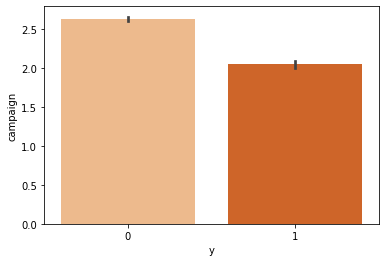

In [40]:
sns.barplot(x = data["y"], y=data["campaign"], palette="Oranges")

Total Term deposite not Purchased for every Job Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

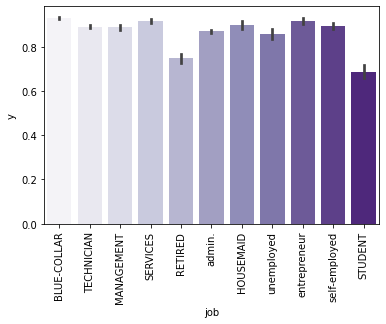

In [41]:
sns.barplot(y = data["y"]==0, x=data["job"], palette="Purples")
plt.xticks(rotation=90)

Total Term deposite Purchased for every Job category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

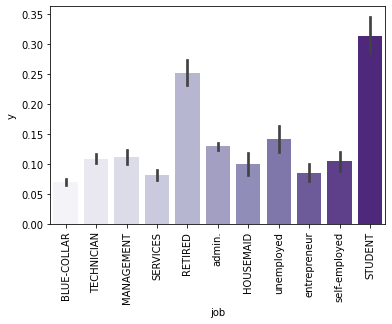

In [42]:
sns.barplot(y = data["y"]==1, x=data["job"], palette="Purples")
plt.xticks(rotation=90)

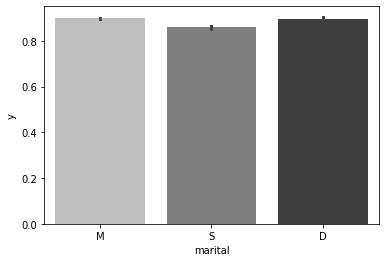

In [43]:
sns.barplot(y = data["y"]==0, x=data["marital"], palette="binary")

sns.barplot(y = data["y"]==0, x=data["marital"], palette="binary")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

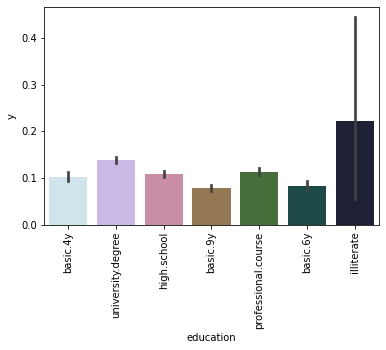

In [44]:
sns.barplot(x=data["education"], y = data["y"], palette="cubehelix_r")
plt.xticks(rotation=90)

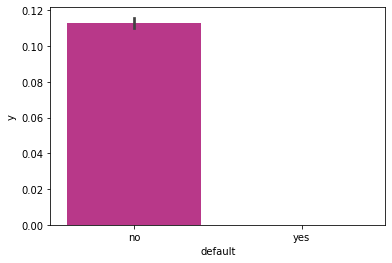

In [45]:
sns.barplot(x=data["default"], y = data["y"], palette="RdPu_r")


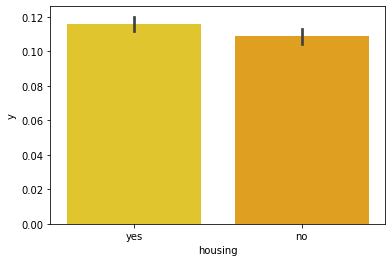

In [46]:
sns.barplot(x=data["housing"], y = data["y"], palette="Wistia")
# plt.xticks(rotation=90)

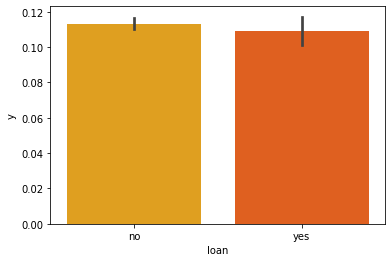

In [47]:
sns.barplot(x=data["loan"], y = data["y"], palette="autumn_r")


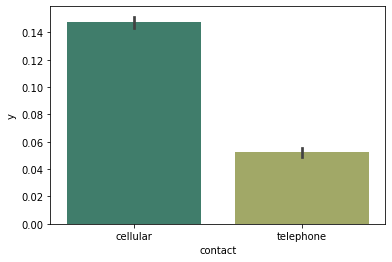

In [48]:
sns.barplot(x=data["contact"], y = data["y"], palette="gist_earth")


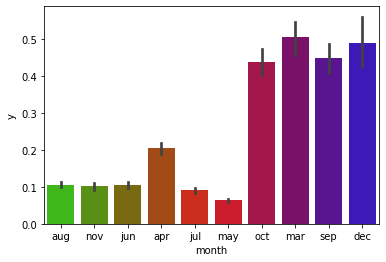

In [49]:
sns.barplot(x=data["month"], y = data["y"], palette="brg_r")

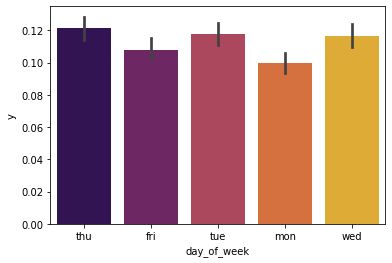

In [50]:
sns.barplot(x=data["day_of_week"], y = data["y"], palette="inferno")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

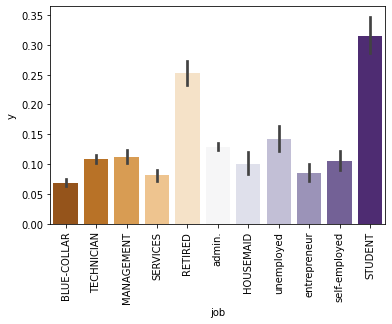

In [51]:
sns.barplot(x=data["job"], y = data["y"], palette="PuOr")
plt.xticks(rotation=90)

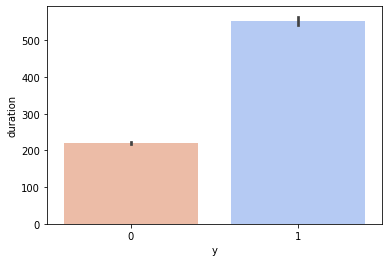

In [52]:
sns.barplot(x=data["y"], y=data["duration"], palette="coolwarm_r")

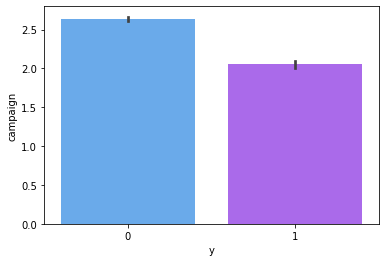

In [53]:
sns.barplot(x=data["y"], y=data["campaign"], palette="cool")

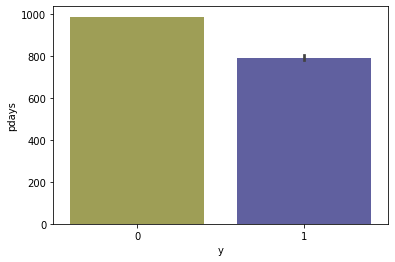

In [54]:
sns.barplot(x=data["y"], y=data["pdays"], palette="gist_stern_r")

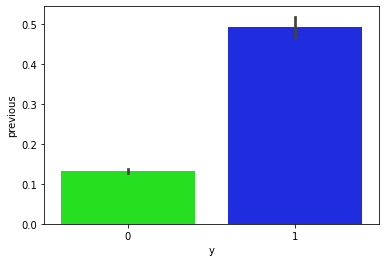

In [55]:
sns.barplot(x=data["y"], y=data["previous"], palette="hsv")

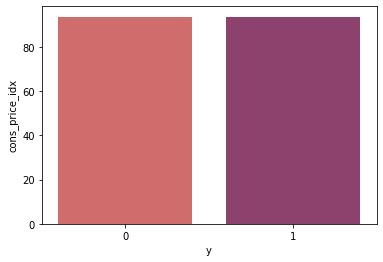

In [56]:
sns.barplot(x=data["y"], y=data["cons_price_idx"], palette="flare")

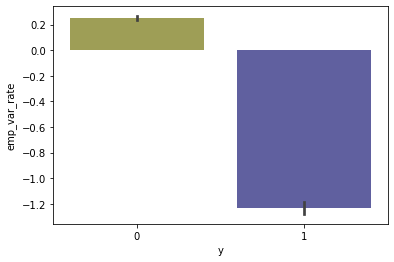

In [57]:
sns.barplot(x=data["y"], y=data["emp_var_rate"], palette="gist_stern_r")

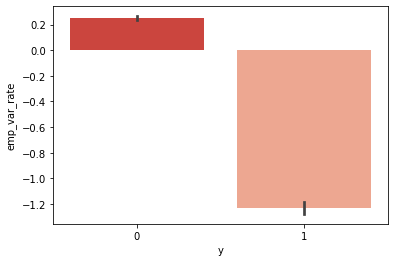

In [58]:
sns.barplot(x=data["y"], y=data["emp_var_rate"], palette="Reds_r")

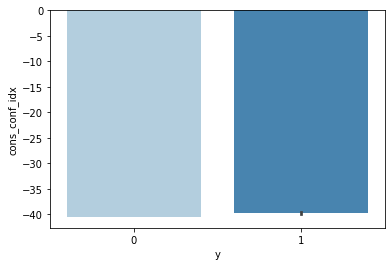

In [59]:
sns.barplot(x=data["y"], y=data["cons_conf_idx"], palette="Blues")

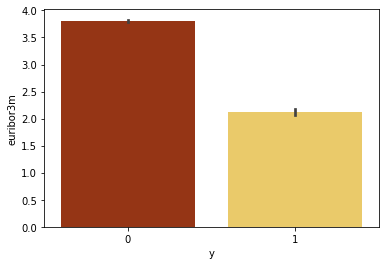

In [60]:
sns.barplot(x=data["y"], y=data["euribor3m"], palette="afmhot")

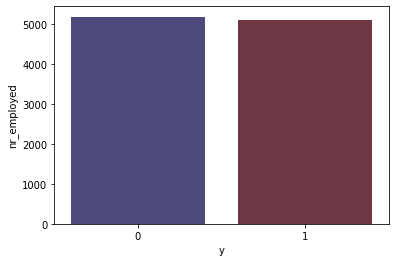

In [61]:
sns.barplot(x=data["y"], y=data["nr_employed"], palette='icefire')

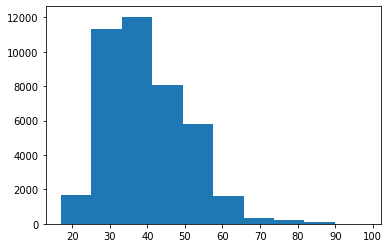

In [62]:
#Histogram plot on age column
plt.hist(data["age"].astype(int))
plt.show()

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## Section IV : Categorical Variable Encoding

In [64]:
#Create dummy variables for your categorial variables
data_new = pd.get_dummies(data)
data_new

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_BLUE-COLLAR,job_HOUSEMAID,job_MANAGEMENT,job_RETIRED,job_SERVICES,job_STUDENT,job_TECHNICIAN,job_admin.,job_entrepreneur,job_self-employed,job_unemployed,marital_D,marital_M,marital_S,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [65]:
# Explore your new dataset with these new dummy variables !
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_BLUE-COLLAR                41188 non-null  uint8  
 12  job_HOUSEMAID                  41188 non-null 

## Section V : Preliminary Training

In [66]:
X = data_new.drop(columns="y")
X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_BLUE-COLLAR,job_HOUSEMAID,job_MANAGEMENT,job_RETIRED,job_SERVICES,job_STUDENT,job_TECHNICIAN,job_admin.,job_entrepreneur,job_self-employed,job_unemployed,marital_D,marital_M,marital_S,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [67]:
y = data_new["y"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

In [68]:
#Import your Logisitc Regression libraries
#Split your train and test dataset and train on the data
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 57)
(10297, 57)
(30891,)
(10297,)


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train, y_train)

array([[ 2.87143627e+00, -1.49099059e-01, -2.00292208e-01, ...,
        -3.39112508e-01,  3.97828753e-01, -1.86189148e-01],
       [-1.63096104e+00, -3.83203026e-01, -5.59784776e-01, ...,
         2.94887383e+00, -2.51364436e+00, -1.86189148e-01],
       [-6.73004165e-01,  8.24950958e-03, -5.59784776e-01, ...,
        -3.39112508e-01,  3.97828753e-01, -1.86189148e-01],
       ...,
       [-2.43435352e-03, -5.63578214e-01, -2.00292208e-01, ...,
        -3.39112508e-01,  3.97828753e-01, -1.86189148e-01],
       [ 1.43450096e+00, -5.44389364e-01,  1.59200360e-01, ...,
        -3.39112508e-01,  3.97828753e-01, -1.86189148e-01],
       [-7.68799853e-01, -5.06011664e-01, -2.00292208e-01, ...,
        -3.39112508e-01,  3.97828753e-01, -1.86189148e-01]])

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
LR = LogisticRegression()

In [74]:
LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [75]:
pred_y = LR.predict(X_test)
pred_y[:]

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
accuracy_score(y_test, pred_y)

0.9075458871515976

In [78]:
classification_report(y_test, pred_y)

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95      9121\n           1       0.67      0.38      0.48      1176\n\n    accuracy                           0.91     10297\n   macro avg       0.80      0.68      0.72     10297\nweighted avg       0.89      0.91      0.90     10297\n'

In [79]:
con_mat = confusion_matrix(y_test, pred_y)
con_mat

array([[8897,  224],
       [ 728,  448]])

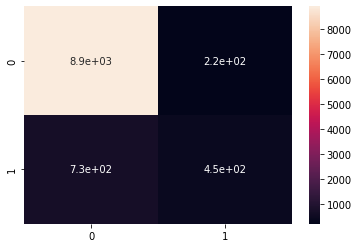

In [80]:
sns.heatmap(con_mat, annot=True)
plt.show()

In [81]:
pd.crosstab(y_test, pred_y)

col_0,0,1
y,,
0,8897,224
1,728,448


In [82]:
604+357

961

In [83]:
7112/7277

0.9773258210801155

In [84]:
357/961

0.37148803329864727

In [85]:
pip install imblearn

In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [87]:
X_train.shape

(30891, 57)

In [88]:
y_train.shape

(30891,)

In [89]:
X_smote , y_smote = smote.fit_resample(X,  y)

In [90]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.25)

In [91]:
X_train_sm.shape

(54822, 57)

In [92]:
y_train_sm.shape

(54822,)

In [93]:
from collections import Counter

In [94]:
print("Before smote", Counter(y_train))
print("After smote", Counter(y_train_sm))

Before smote Counter({0: 27427, 1: 3464})
After smote Counter({1: 27444, 0: 27378})


In [95]:
LogR = LogisticRegression()
LogR.fit(X_train_sm, y_train_sm)
pred_y_smote = LogR.predict(X_test_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [96]:
#accuracy score for smote
accuracy_score(y_test_sm, pred_y_smote)

0.8722775528072672

In [114]:
print(classification_report(y_test_sm, pred_y_smote))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      9170
           1       0.88      0.87      0.87      9104

    accuracy                           0.87     18274
   macro avg       0.87      0.87      0.87     18274
weighted avg       0.87      0.87      0.87     18274



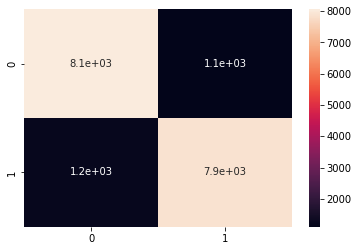

In [98]:
corr_smote = confusion_matrix(y_test_sm, pred_y_smote)
sns.heatmap(corr_smote, annot=True)
plt.show()

In [99]:
corr_smote

array([[8058, 1112],
       [1222, 7882]])

In [100]:
pd.crosstab(y_test_sm, pred_y_smote)

col_0,0,1
y,,
0,8058,1112
1,1222,7882


## Section VII : Let us Re-Train!

In [101]:
#Explore what RFE means
from sklearn.feature_selection import RFE

estimator = LogisticRegression()

In [102]:
# Implement your training process inside the RFE
selector = RFE(estimator, n_features_to_select=10, step=1)

In [103]:
selector_rfe = selector.fit_transform(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [104]:
pred_y_rfe = selector.predict(X_test)
pred_y_rfe

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
selector.score(X_test, y_test)

0.8975429736816548

In [106]:
selector.support_

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False,  True, False, False, False,
        True, False,  True])

In [107]:
# What are the best columns that your RFE found? Please make a list of it
print(X_train.columns[selector.support_])

Index(['euribor3m', 'job_RETIRED', 'job_STUDENT', 'month_apr', 'month_mar',
       'month_may', 'month_nov', 'day_of_week_mon', 'poutcome_failure',
       'poutcome_success'],
      dtype='object')


In [110]:
#Create the prediction system to get the metrics such as accuracy
accuracy_score(y_test, pred_y_rfe)

0.8975429736816548

## Section IX : Additional Metrics

In [111]:
#Create the confusion matrix for the predictions and make note of the outputs
confusion_matrix(y_test, pred_y_rfe)

array([[9031,   90],
       [ 965,  211]])

In [113]:
#Create a classification report and make note of various outputs
print(classification_report(y_test, pred_y_rfe))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9121
           1       0.70      0.18      0.29      1176

    accuracy                           0.90     10297
   macro avg       0.80      0.58      0.62     10297
weighted avg       0.88      0.90      0.87     10297



## Reports

In [120]:
print("Normal Accuracy of {} but the predictions are not valid and Biased".format(accuracy_score(y_test, pred_y)*100))
print("After using smote where the Categories in Target variable are balanced having the accuracy is {}".format(accuracy_score(y_test_sm, pred_y_smote)*100))
print("Using RFE for prominant feature selection the accuracy is {}".format(accuracy_score(y_test, pred_y_rfe)*100))

Normal Accuracy of 90.75458871515976 but the predictions are not valid and Biased
After using smote where the Categories in Target variable are balanced having the accuracy is 87.22775528072671
Using RFE for prominant feature selection the accuracy is 89.75429736816548
